In [1]:
# loading packages
# basic + dates 
import numpy as np
import pandas as pd
from pandas import datetime
from datetime import datetime

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
%matplotlib inline

# statistics
from statsmodels.distributions.empirical_distribution import ECDF

# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings("ignore")
import sys
import warnings
import itertools
warnings.filterwarnings("ignore")



import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

<ipython-input-1-3ecb860958eb>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
df1=pd.read_excel('global_superstore_2016.xlsx')
print(df1.shape)
df1.head(2)

(51290, 24)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,40.77,High
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical


In [3]:
pd.options.display.max_columns = None

In [5]:
df3=df1[['Order Date','Sales']]
df3.head()

,Order Date,Sales
0,2014-11-11,221.980
1,2014-02-05,3709.395
2,2014-10-17,5175.171
3,2014-01-28,2892.510
4,2014-11-05,2832.960


In [6]:
import datetime as dt
df3['Year']=df3['Order Date'].dt.year
df3['Month']=df3['Order Date'].dt.month
sales_data=pd.DataFrame(df3.groupby(['Year','Month'])['Sales'].sum())
sales_data.head()

Sales
Year Month              
2012 1       98898.48886
     2      103717.92328
     3      135746.40206
     4      114332.96318
     5      158228.32880

In [7]:
date = pd.date_range(start='1/1/2012',periods=len(sales_data), freq='M')
date

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31',
               '2012-09-30', '2012-10-31', '2012-11-30', '2012-12-31',
               '2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31',
               '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31'],
              dtype='datetime64[ns]', freq='M')

In [8]:
sales_data["Time_Stamp"] = date
sales_data.head()

Sales Time_Stamp
Year Month                         
2012 1       98898.48886 2012-01-31
     2      103717.92328 2012-02-29
     3      135746.40206 2012-03-31
     4      114332.96318 2012-04-30
     5      158228.32880 2012-05-31

In [9]:
sales_data.set_index('Time_Stamp', inplace=True, drop='Time_stamp')
sales_data.head()

,Sales
Time_Stamp,
2012-01-31,98898.48886
2012-02-29,103717.92328
2012-03-31,135746.40206
2012-04-30,114332.96318
2012-05-31,158228.32880


In [10]:
sales_data.describe()

,Sales
count,48.000000
mean,263385.456456
std,113156.113781
min,98854.962080
25%,175175.900230
50%,254557.774310
75%,324256.510015
max,555279.027000


In [11]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  51290 non-null  datetime64[ns]
 1   Sales       51290 non-null  float64       
 2   Year        51290 non-null  int64         
 3   Month       51290 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 1.6 MB


In [12]:
df3.index

RangeIndex(start=0, stop=51290, step=1)

In [13]:
df1.set_index('Order Date',inplace=True)

In [14]:
df3.index

RangeIndex(start=0, stop=51290, step=1)

In [15]:
df1['Year'] = df1.index.year
df1['Month'] = df1.index.month
df1['Day'] = df1.index.day
df1['WeekOfYear'] = df1.index.weekofyear
df1.head()

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Year,Month,Day,WeekOfYear
Order Date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-11-11,40098,CA-2014-AB10015140-41954,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,United States,Central US,USCA,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,40.77,High,2014,11,11,46
2014-02-05,26341,IN-2014-JR162107-41675,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,2014,2,5,6
2014-10-17,25330,IN-2014-CR127307-41929,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,Australia,Oceania,Asia Pacific,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,2014,10,17,42
2014-01-28,13524,ES-2014-KM1637548-41667,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,Berlin,Germany,Western Europe,Europe,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,2014,1,28,5
2014-11-05,47221,SG-2014-RH9495111-41948,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,Dakar,Senegal,Western Africa,Africa,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,2014,11,5,45


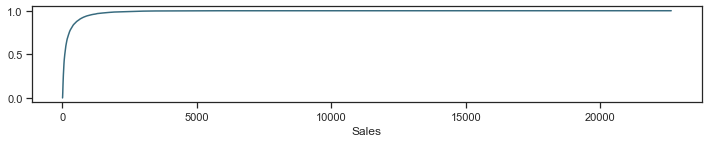

In [16]:
## Plot ECDF: Empirical Cumulative Distribution Function
#ECDF - Adds up the number of observations that are there for a certain value.
sns.set(style = "ticks")# to format into seaborn 
c = '#386B7F' # basic color for plots
plt.figure(figsize = (12, 6))

  
plt.subplot(312)
cdf = ECDF(df1['Sales'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c)
plt.xlabel('Sales');

In [17]:
df1.isnull().sum()

Row ID                0
Order ID              0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
Postal Code       41296
City                  0
State                 0
Country               0
Region                0
Market                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
Year                  0
Month                 0
Day                   0
WeekOfYear            0
dtype: int64

In [18]:
df1["Category"].unique()

array(['Technology', 'Furniture', 'Office Supplies'], dtype=object)

In [19]:
df1.corr()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost,Year,Month,Day,WeekOfYear
Row ID,1.000000,0.009671,-0.043889,-0.173483,0.087594,-0.019037,-0.038431,-0.000921,-0.028987,-0.006609,-0.028601
Postal Code,0.009671,1.000000,-0.023854,0.012761,0.058443,-0.029961,-0.025491,0.004539,0.024958,0.019982,0.022716
Sales,-0.043889,-0.023854,1.000000,0.313577,-0.086722,0.484918,0.767835,-0.002905,0.001851,0.001658,0.001658
Quantity,-0.173483,0.012761,0.313577,1.000000,-0.019875,0.104365,0.271804,-0.005049,0.020646,0.003831,0.019915
Discount,0.087594,0.058443,-0.086722,-0.019875,1.000000,-0.316490,-0.078153,-0.005894,-0.000180,-0.004290,-0.000331
Profit,-0.019037,-0.029961,0.484918,0.104365,-0.316490,1.000000,0.354423,0.002626,0.000173,-0.002721,-0.000091
Shipping Cost,-0.038431,-0.025491,0.767835,0.271804,-0.078153,0.354423,1.000000,-0.003135,0.004956,0.004825,0.005230
Year,-0.000921,0.004539,-0.002905,-0.005049,-0.005894,0.002626,-0.003135,1.000000,-0.011016,-0.001365,0.000970
Month,-0.028987,0.024958,0.001851,0.020646,-0.000180,0.000173,0.004956,-0.011016,1.000000,0.001875,0.974963
Day,-0.006609,0.019982,0.001658,0.003831,-0.004290,-0.002721,0.004825,-0.001365,0.001875,1.000000,0.066145


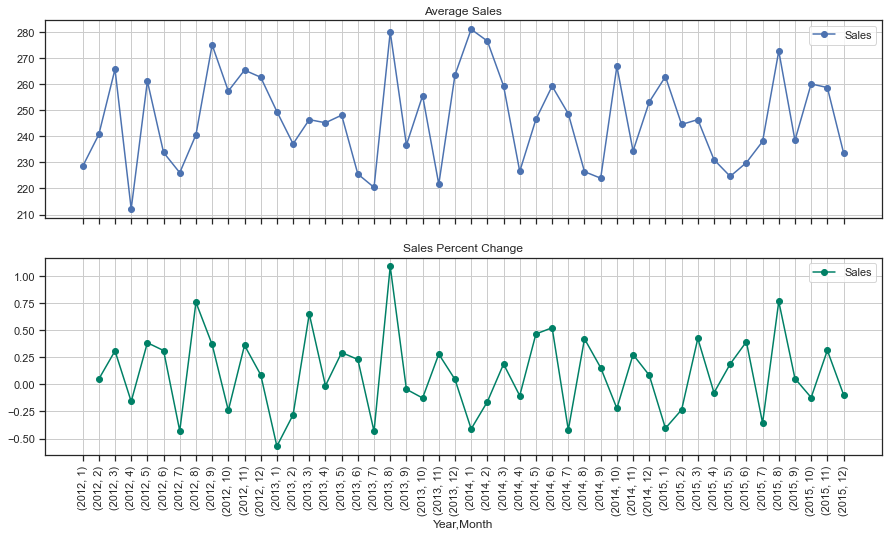

In [20]:
# group by date and get average Sales, and precent change
average_sales    = df1.groupby(['Year',"Month"])["Sales"].mean()
pct_change_sales = df1.groupby(['Year',"Month"])["Sales"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average Sales over time(year-month)
ax1 = average_sales.plot(legend=True,ax=axis1,marker='o',grid=True,title="Average Sales")
ax1.set_xticks(range(len(average_sales)))
ax1.set_xticklabels(average_sales.index.tolist(), rotation=90)
# plot precent change for Sales over time(year-year of month)
ax2 = pct_change_sales.plot(legend=True,ax=axis2,marker='o',rot=90,grid=True,colormap="summer",title="Sales Percent Change")

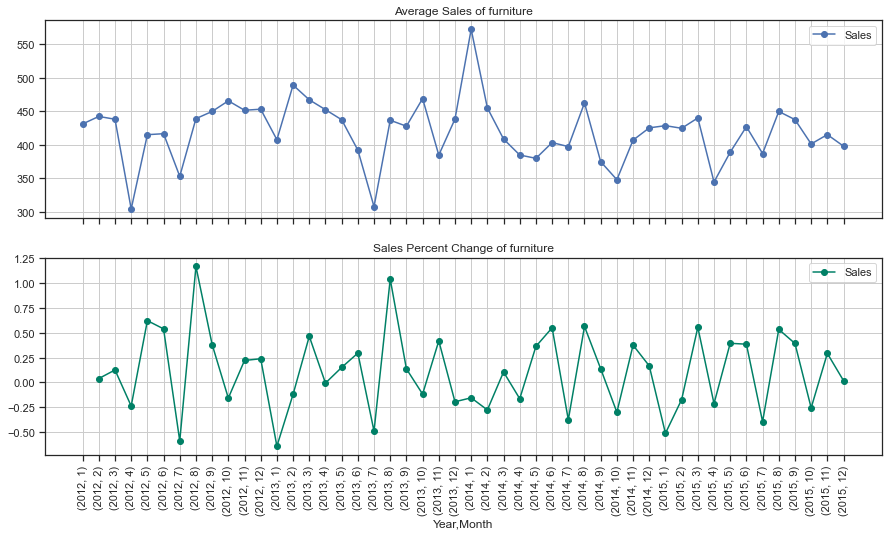

In [22]:
# group by date and get average Sales, and precent change
average_sales_fur    =df1[df1["Category"]=="Furniture"].groupby(['Year',"Month"])["Sales"].mean()
pct_change_sales_fur = df1[df1["Category"]=="Furniture"].groupby(['Year',"Month"])["Sales"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average Sales over time(year-month)
ax1 = average_sales_fur.plot(legend=True,ax=axis1,marker='o',grid=True,title="Average Sales of furniture")
ax1.set_xticks(range(len(average_sales)))
ax1.set_xticklabels(average_sales.index.tolist(), rotation=90)
# plot precent change for Sales over time(year-year of month)
ax2 = pct_change_sales_fur.plot(legend=True,ax=axis2,marker='o',rot=90,grid=True,colormap="summer",title="Sales Percent Change of furniture")

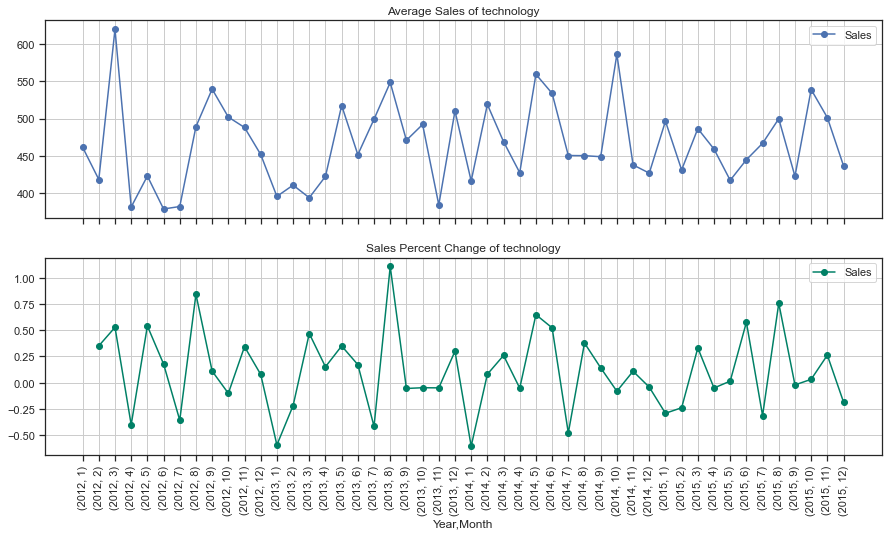

In [23]:
# group by date and get average Sales, and precent change
average_sales_tech    =df1[df1["Category"]=="Technology"].groupby(['Year',"Month"])["Sales"].mean()
pct_change_sales_tech = df1[df1["Category"]=="Technology"].groupby(['Year',"Month"])["Sales"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average Sales over time(year-month)
ax1 = average_sales_tech.plot(legend=True,ax=axis1,marker='o',grid=True,title="Average Sales of technology")
ax1.set_xticks(range(len(average_sales)))
ax1.set_xticklabels(average_sales.index.tolist(), rotation=90)
# plot precent change for Sales over time(year-year of month)
ax2 = pct_change_sales_tech.plot(legend=True,ax=axis2,marker='o',rot=90,grid=True,colormap="summer",title="Sales Percent Change of technology")

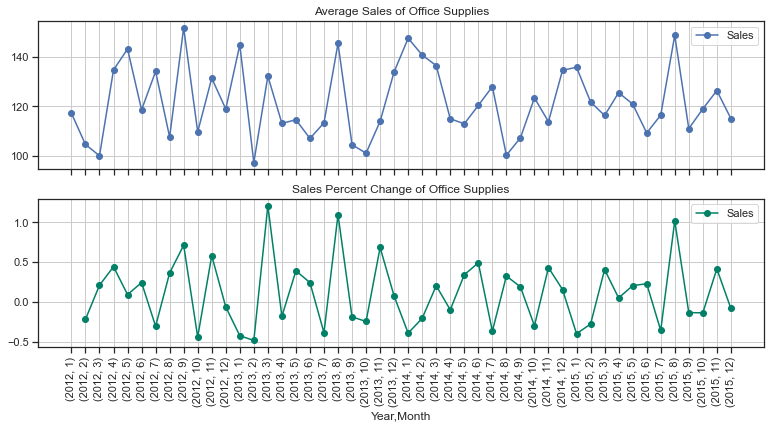

In [29]:
# group by date and get average Sales, and precent change
average_sales_OS    =df1[df1["Category"]=="Office Supplies"].groupby(['Year',"Month"])["Sales"].mean()
pct_change_sales_OS = df1[df1["Category"]=="Office Supplies"].groupby(['Year',"Month"])["Sales"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True)

# plot average Sales over time(year-month)
ax1 = average_sales_OS.plot(legend=True,ax=axis1,marker='o',grid=True,title="Average Sales of Office Supplies")
ax1.set_xticks(range(len(average_sales)))
ax1.set_xticklabels(average_sales.index.tolist(), rotation=90)
# plot precent change for Sales over time(year-year of month)
ax2 = pct_change_sales_OS.plot(legend=True,ax=axis2,marker='o',rot=90,grid=True,colormap="summer",title="Sales Percent Change of Office Supplies")

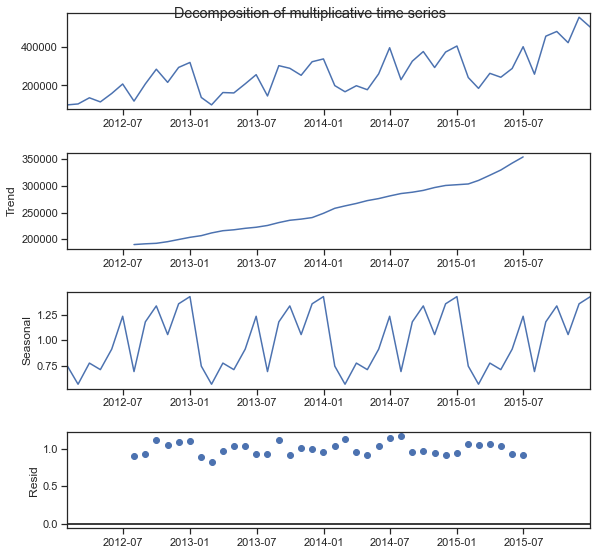

In [27]:
decomposition = sm.tsa.seasonal_decompose(sales_data, model='multiplicative')
fig = decomposition.plot()
fig.set_figwidth(8)
fig.set_figheight(8)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()